In [27]:
import numpy as np
import matplotlib.pyplot as plt

# Metoda Eulera

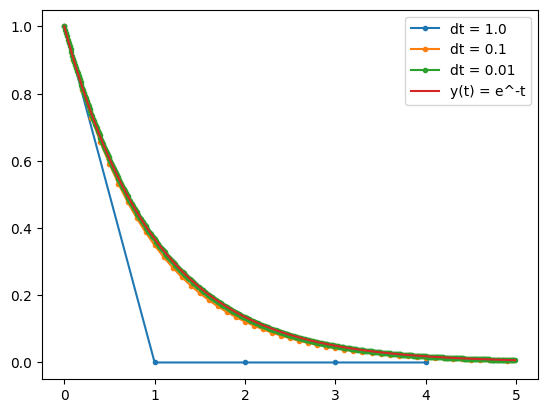

In [49]:
t_min = 0
t_max = 5

ax = plt.subplots()[1]

for dt in [1.0, 0.1, 0.01]:
    t = np.arange(t_min, t_max, dt)

    N = t.size
    y = np.zeros(t.size)

    y[0] = 1
    lmd = -1


    for n in range(0, N - 1):
        y[n + 1] = y[n] + dt * lmd * y[n]

    ax.plot(t, y, ".-")

yd = np.exp(-t)
ax.plot(t, yd, "-")

ax.legend(["dt = 1.0", "dt = 0.1", "dt = 0.01", "y(t) = e^-t"])
